In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
raw = pd.read_csv('Validations-CDG1-Septembre-2.csv',sep='\t',low_memory=False)
raw.head(3)

,TRSC_IDE_CAR,TRSC_DAT_VAL,TRSC_NB_TRSC,GARE_IDE_GAR,LICA_IDE_LIG_CAB,EQVA_IDE_EQT_VAL,FAEQ_IDE_FAM_EQT,IDE_SEN_PAS_UNI,SEFN_IDE_SEN_FON_NOR,TEVA_IDE_TEC_VAL,RPT_IDE_PDT_TAR_UNIF,VALI_IDE_VAL,TRSC_NB_CONT,GARE_IDE_GAR_ORI,GARE_IDE_GAR_DES
0,NaN,01SEP15:08:59:00,1,271460,1,9,20,4,0,0,NaN,0,1,NaN,NaN
1,NaN,01SEP15:08:59:00,1,271460,1,9,20,4,0,0,NaN,0,1,NaN,NaN
2,NaN,02SEP15:18:17:00,1,271460,1,9,20,4,0,0,NaN,0,1,NaN,NaN


In [2]:
def extractDay(row):
    return int(row['TRSC_DAT_VAL'][:2])
def extractYear(row):
    if(row['TRSC_DAT_VAL'][5:7]!='60'):
        return 2000+int(row['TRSC_DAT_VAL'][5:7])

raw['day']=raw.apply(extractDay,axis=1)
raw['year']=raw.apply(extractYear,axis=1)

In [3]:
table = pd.pivot_table(raw, values='TRSC_NB_TRSC', index=['year'],columns=['TEVA_IDE_TEC_VAL'], aggfunc=np.sum)

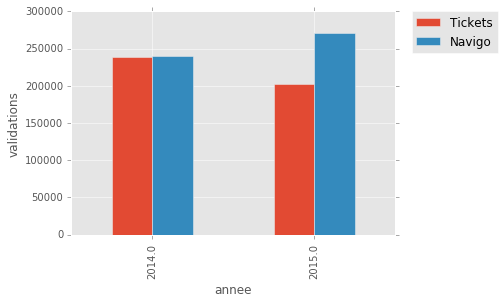

In [4]:
plt.style.use('ggplot')
plt.figure();
table.plot(kind='bar')
#plt.hist(x=range(1,31),y=[x for x in range(1,31)])
plt.xlabel('annee')
plt.ylabel('validations')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.legend(["Tickets","Navigo"],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()